# Capstone project predicting insurance risk analysis

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#import data files: files in CSV format
df =pd.read_csv('Dataset.csv', index_col='Id')



In [3]:
#Check if there are any missing data with count() method and fill it with df.fillna()
df.shape
df.count()
df = df.fillna(method='ffill').fillna(method='bfill')

In [4]:
# Datatypes of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 58.0+ MB


Summary Statistcis for all the variables to check for Mean, SD, 25th quantile, 75th quantile, Min, Max 

In [7]:
#Summary Statistics of the Data Frame
df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


Univariate Analysis to check for dependent variable. The dependent varaible has eight discrete values. Use bar plot to compare the eight distinct responses.

,Response
Response,
1,6207
2,6552
3,1013
4,1428
5,5432
6,11233
7,8027
8,19489


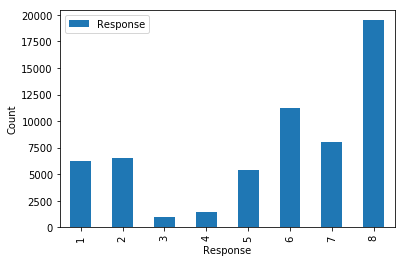

In [8]:
# Univariate analysis of the Response data - bar plot
df.groupby([ 'Response'])[['Response']].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['Response' ])[['Response']].count()

Univariate Analysis using Histogram to visualize the continous variables in the dataset. Below is an example of variable "BMI"

,BMI
count,59381.000000
mean,0.469462
std,0.122213
min,0.000000
25%,0.385517
50%,0.451349
75%,0.532858
max,1.000000


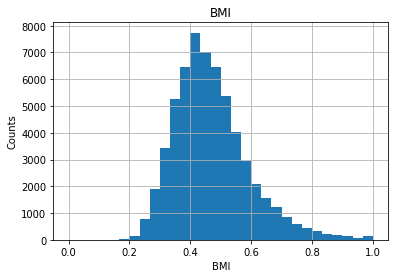

In [9]:
# Univariate analysis- Histogram. Continous Variables: Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, 
# Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5
ax = df['BMI'].hist(bins=30)
ax.set_ylabel('Counts')
ax.set_xlabel('BMI')
ax.set_title('BMI')
pd.DataFrame(df['BMI']).describe()

Bivariate Analysis: Effect of Age on Response (dependent variable). This analysis is used to check how age affects each of the responses.

,mean,std
Response,,
1,0.492908,0.202704
2,0.460992,0.193211
3,0.359476,0.188468
4,0.337033,0.173476
5,0.404595,0.201250
6,0.426265,0.188431
7,0.434459,0.185575
8,0.342974,0.185573


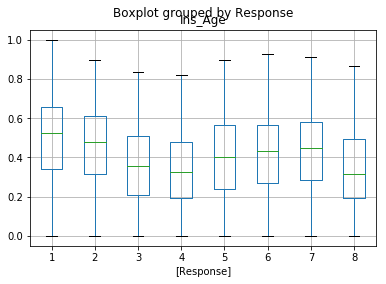

In [10]:
#Bivariate Analysis: Response v. Ins_Age
df.boxplot(column=['Ins_Age'],by = ['Response'])#.set_yscale('log')
pd.DataFrame(df.groupby( ['Response'])['Ins_Age'].describe().loc[:,['mean','std']])

Bivariate Analysis: Effect of BMI on Response. Here we see BMI clearly show a trend amongst the Responses. Notice Response-8 has a lower BMI 

,mean,std
Response,,
1,0.509306,0.147606
2,0.546909,0.157569
3,0.515884,0.119768
4,0.417773,0.075936
5,0.570763,0.127321
6,0.490632,0.098622
7,0.464679,0.076837
8,0.393644,0.069260


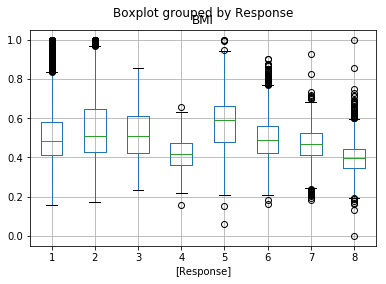

In [11]:
#Bivariate Analysis: Response v. BMI
df.boxplot(column=['BMI'], by = ['Response'])#.set_yscale('log')
pd.DataFrame(df.groupby( ['Response'])['BMI'].describe().loc[:,['mean','std']])

This is an example to check the effect of outliers on the Response. If we use 5th- 95th percentile, the outliers can be significantly reduced. However, the effect on Response is not that different. Hence, we keep all the data for analysis.

,mean,std
Response,,
1,0.482278,0.095110
2,0.492214,0.095193
3,0.506660,0.102464
4,0.428797,0.067177
5,0.545368,0.103682
6,0.490226,0.087142
7,0.468573,0.071756
8,0.406727,0.059073


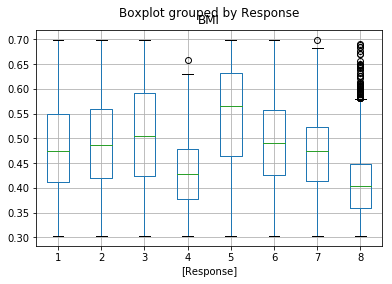

In [12]:
# Choose percentile to miinimize the outliers
P = np.percentile(df['BMI'], [5, 95])
df_BMI = df[(df['BMI'] > P[0]) & (df['BMI'] < P[1])]
df_BMI.boxplot(column=['BMI'], by = ['Response'])#.set_yscale('log')
pd.DataFrame(df_BMI.groupby( ['Response'])['BMI'].describe().loc[:,['mean','std']])

Example of catogorical variable effect on Response. Each response is grouped by the Response percentage on the catogorical values

                             Response
Medical_History_4 Response           
1                 1          2.833652
                  2          5.586400
                  3          2.791177
                  4          5.202108
                  5          9.319094
                  6         35.156700
                  7         14.313886
                  8         24.796982
2                 1          1.443788
                  2          3.214071
                  3          0.118302
                  4          0.240843
                  5          7.609037
                  6         13.837465
                  7         17.823676
                  8         55.712820


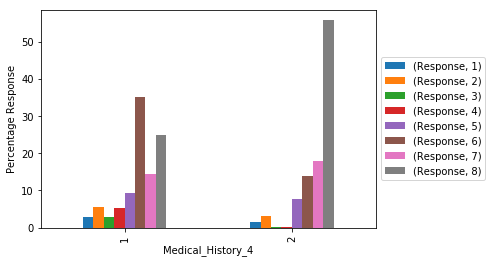

In [13]:
#Response percentages for the catogorical variables - InsuredInfo_1

res =df.groupby(['Medical_History_4','Response'])[['Response']].sum()
Res_percent = res.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(Res_percent)
Res_percent.unstack().plot(kind='bar')
plt.ylabel('Percentage Response')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Another example of the effect of catogorical variable on the the Response grouped by percentage response

                              Response
Medical_Keyword_20 Response           
0                  1          1.857794
                   2          3.913841
                   3          0.914736
                   4          1.708954
                   5          8.127473
                   6         20.147696
                   7         16.758713
                   8         46.570794
1                  1          1.452870
                   2          4.039688
                   3          0.106308
                   4          1.417434
                   5          6.555634
                   6         18.710135
                   7         20.092133
                   8         47.625797


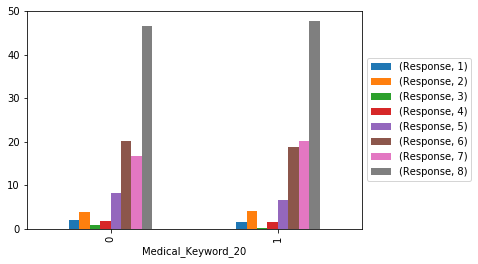

In [14]:
# Response percentages for the catogorical variables -
res =df.groupby(['Medical_Keyword_20','Response'])[['Response']].sum()
Res_percent = res.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(Res_percent)
Res_percent.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Correlation coefficants between independent variables to check for dependencies. Use "Pearson" method on continous variables and "Spearman" method on catogorical variables.

In [15]:
#Correlation Coefficiants between independent variables
df[['Ins_Age','BMI','Ht', 'Wt','Response']].corr(method='pearson')

,Ins_Age,BMI,Ht,Wt,Response
Ins_Age,1.000000,0.137076,0.008419,0.110366,-0.209610
BMI,0.137076,1.000000,0.123125,0.854083,-0.381601
Ht,0.008419,0.123125,1.000000,0.610425,-0.093576
Wt,0.110366,0.854083,0.610425,1.000000,-0.351395
Response,-0.209610,-0.381601,-0.093576,-0.351395,1.000000


In [16]:
#Correlation Coefficiants between independent variables
df.loc[:,'Employment_Info_1':'Employment_Info_6'].corr(method='spearman')

,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6
Employment_Info_1,1.000000,0.300670,-0.362002,-0.098792,-0.329241,0.318497
Employment_Info_2,0.300670,1.000000,-0.693852,-0.117840,-0.220628,0.025497
Employment_Info_3,-0.362002,-0.693852,1.000000,0.186428,0.301012,0.025092
Employment_Info_4,-0.098792,-0.117840,0.186428,1.000000,0.006959,0.165067
Employment_Info_5,-0.329241,-0.220628,0.301012,0.006959,1.000000,-0.037272
Employment_Info_6,0.318497,0.025497,0.025092,0.165067,-0.037272,1.000000


In [17]:
#Correlation Coefficiants between independent variables
df.loc[:,'Medical_History_1':'Medical_History_41'].corr(method='spearman')

,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,...,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41
Medical_History_1,1.000000,0.008961,-0.018233,0.021780,-0.008668,0.064889,0.019825,-0.051807,0.067914,0.000566,...,0.001357,-0.006563,0.029010,-0.001079,-0.029610,0.021594,-0.005907,0.115659,0.011584,-0.102828
Medical_History_2,0.008961,1.000000,-0.013937,-0.013902,0.008168,0.011661,0.011445,0.003770,-0.020861,-0.001552,...,0.008249,-0.018154,-0.020939,0.001360,-0.044813,-0.025281,0.007613,0.040848,-0.014684,0.017169
Medical_History_3,-0.018233,-0.013937,1.000000,0.037744,0.000359,-0.012884,-0.000087,0.027096,-0.047977,0.002788,...,0.004962,0.032683,-0.012995,0.002865,0.028025,0.007095,-0.012339,-0.036225,0.019970,0.071724
Medical_History_4,0.021780,-0.013902,0.037744,1.000000,-0.009913,0.065762,-0.005398,-0.027731,0.056742,0.006532,...,0.005332,0.259491,0.052344,0.000436,0.067200,0.015532,-0.074240,0.020756,0.113201,-0.040302
Medical_History_5,-0.008668,0.008168,0.000359,-0.009913,1.000000,-0.013891,0.004254,0.014512,-0.022479,0.000545,...,0.000054,-0.002995,-0.004478,-0.002777,-0.004176,-0.007559,-0.003155,-0.004380,-0.007707,0.019703
Medical_History_6,0.064889,0.011661,-0.012884,0.065762,-0.013891,1.000000,0.013568,-0.054778,0.054650,-0.004103,...,0.001213,0.020032,0.047767,-0.015056,0.026849,0.033897,-0.003338,0.096061,0.014587,-0.067998
Medical_History_7,0.019825,0.011445,-0.000087,-0.005398,0.004254,0.013568,1.000000,-0.438704,0.008566,-0.002188,...,0.002141,0.000076,-0.005369,0.000736,-0.056401,-0.001284,-0.003554,0.012881,0.005205,0.003821
Medical_History_8,-0.051807,0.003770,0.027096,-0.027731,0.014512,-0.054778,-0.438704,1.000000,-0.096482,0.002096,...,0.002126,-0.021707,-0.032859,0.005891,0.018225,-0.039180,0.005262,-0.038646,-0.016972,0.082344
Medical_History_9,0.067914,-0.020861,-0.047977,0.056742,-0.022479,0.054650,0.008566,-0.096482,1.000000,-0.005929,...,-0.003135,0.037908,0.070480,-0.003388,0.027418,0.028672,-0.009063,0.070537,0.018588,-0.167178
Medical_History_10,0.000566,-0.001552,0.002788,0.006532,0.000545,-0.004103,-0.002188,0.002096,-0.005929,1.000000,...,0.057470,-0.001073,-0.000194,0.004336,0.010967,-0.001365,0.005174,-0.000894,-0.004874,0.008957


Import modules for one way ANOVA table

In [18]:
# import modules for building ANOVA 
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

ANOVA table for F & P statistics

In [19]:
#ANOVA table
mod = ols('Ins_Age ~ Response', data = df).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

               df       sum_sq     mean_sq            F  PR(>F)
Response      1.0   101.445883  101.445883  2728.785405     0.0
Residual  59379.0  2207.485827    0.037176          NaN     NaN


F and P statistics and Hypothesis testing for H0(Null Hypothesis)

In [20]:
import numpy as np
from scipy import stats
f, p = stats.f_oneway(df['Ins_Age'], df['Response'])
print('F value:', f)
print('P value:', p, '\n')

#from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['BMI'], df['Response'])
result = mc.tukeyhsd()                        
print(result)                       
print(mc.groupsunique)                        

F value: 267498.7401525678
P value: 0.0 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2     0.0376   0.0319  0.0433  True 
  1      3     0.0066  -0.0042  0.0174 False 
  1      4    -0.0915  -0.1009 -0.0822  True 
  1      5     0.0615   0.0555  0.0674  True 
  1      6    -0.0187  -0.0237 -0.0136  True 
  1      7    -0.0446   -0.05  -0.0392  True 
  1      8    -0.1157  -0.1203  -0.111  True 
  2      3     -0.031  -0.0418 -0.0202  True 
  2      4    -0.1291  -0.1385 -0.1198  True 
  2      5     0.0239   0.018   0.0297  True 
  2      6    -0.0563  -0.0612 -0.0513  True 
  2      7    -0.0822  -0.0875 -0.0769  True 
  2      8    -0.1533  -0.1578 -0.1487  True 
  3      4    -0.0981  -0.1112  -0.085  True 
  3      5     0.0549   0.044   0.0658  True 
  3      6    -0.0253  -0.0357 -0.0148  True 
  3      7    -0.0512  -0.0619 -0.0406  True 
  3      8    -0.1222  -0.1325  -

Split Dataset to train (80%) and test (20%) from the original data

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv('Dataset.csv', index_col = 'Id')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.8

train = df[msk]
test = df[~msk]
train.to_csv('train.csv')
test.to_csv('test.csv')

train dataset -- 80% original data

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47441 entries, 2 to 79144
Columns: 128 entries, Product_Info_1 to split
dtypes: float64(19), int64(108), object(1)
memory usage: 46.7+ MB


test dataset --20% original data

In [ ]:
test.info()

Descison Tree Classifier - import all modules

In [23]:
from __future__ import print_function

import os
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [24]:
 df2 = pd.read_csv("train.csv", index_col='Id')

In [25]:
df2 = df2.fillna(method='ffill').fillna(method='bfill')

df2 = df2.iloc[:, 0:128]
df2 = df2.drop( ['Product_Info_2'], axis=1)
y = df2['Response']
X = df2.iloc[:, 0:77]


Plot the decision tree

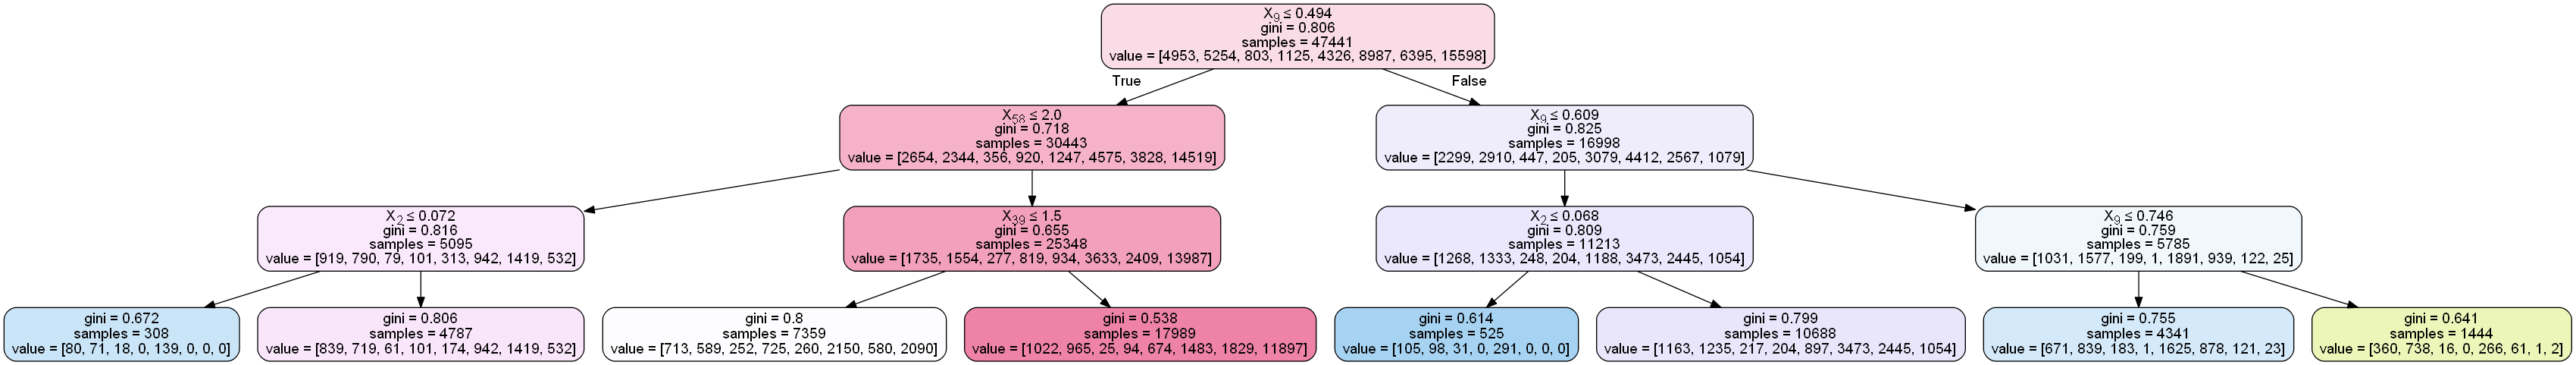

In [26]:
dt = DecisionTreeClassifier(max_depth =3,  random_state=99)
dt.fit(X, y)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

DATA ANALYSIS, DATA MODELS

In [28]:
#DECISION TREE CLASSIFIER
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import time
start = time.process_time()  
  # X -> features, y -> label 
X = X
y = y 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

#Accuracy 
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
print(cm)
importance = dtree_model.feature_importances_
importance = pd.DataFrame(importance,  index =X.columns, columns=["Importance",])
importance = importance.sort_values(['Importance'], ascending=False).head(10)
print('Feature Importance is {}'.format(importance))
print('process time: {}'.format(time.process_time() - start))

0.5192648174690161
[[ 145  197   22   49   93  308  143  277]
 [ 109  272   26   24  152  298  147  275]
 [  22   14   42   41   27   34    7    8]
 [  11   13   17  163    0   44    6   45]
 [  75  106    7    4  483  228   62  112]
 [  89  116   13   52   81 1124  298  495]
 [  38   40    4    9    7  352  534  600]
 [  22   22    0   15   11  275  160 3396]]
Feature Importance is                     Importance
BMI                   0.317802
Medical_History_4     0.114113
Medical_History_23    0.097635
Product_Info_4        0.084439
Medical_History_15    0.076703
Ins_Age               0.050593
Medical_History_39    0.030409
InsuredInfo_6         0.030163
Family_Hist_3         0.015409
Medical_History_30    0.013640
process time: 0.625


In [27]:
#Check for accuracy with 10 important features
#DECISION TREE CLASSIFIER
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import time
start = time.process_time()
    
 
  # X -> features, y -> label 
X1 = X[['BMI', 'Medical_History_4', 'Medical_History_23','Product_Info_4',
        'Medical_History_15','Ins_Age', 'Medical_History_39', 'InsuredInfo_6','Wt', 'Medical_History_30']]
y = y 
  
# dividing X, y into train and test data 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, random_state = 0) 
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X1_train, y1_train) 
dtree_predictions = dtree_model.predict(X1_test) 

#Accuracy 
accuracy1 = dtree_model.score(X1_test, y1_test)
print(accuracy1)
#print process time
print('process time: {}'.format(time.process_time() - start))

0.5191805075457381
process time: 0.109375


In [30]:
# RandomizedSearchCV for Hyperparameter finetuning
# Import necessary modules
from scipy.stats import randint
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": randint(2,16),
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))



Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.4495900170738391


In [31]:
#RANDOM FOREST CLASSIFIER
# importing necessary libraries 
#from sklearn import datasets 
#from sklearn.metrics import confusion_matrix 
#from sklearn.model_selection import train_test_split 
  
  # X -> features, y -> label 
X = X
y = y 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a DescisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
dtree_model = RandomForestClassifier(n_estimators = 100, max_depth = 15).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

#Accuracy 
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

C:\Users\GG\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.5282016693364809
[[ 169  172    6   17  105  319  124  322]
 [ 101  251    3    8  147  368  127  298]
 [  15   17   24   24   28   69    6   12]
 [  15    2    3  103    0   99    7   70]
 [  26   85    2    1  552  237   49  125]
 [  63   74    1   13   78 1191  219  629]
 [  24    7    0    3    7  442  453  648]
 [   4    2    0    2    9  233  129 3522]]


In [ ]:
#SVM (Support Vector Machine)- Classifer is not a good model for more than 2 catagories
# importing necessary libraries 
#from sklearn import datasets 
#from sklearn.metrics import confusion_matrix 
#from sklearn.model_selection import train_test_split 
  

# X -> features, y -> label 
#X = X
#y = y
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a linear SVM classifier 
#from sklearn.svm import SVC 
#svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
#svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
#accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy) 
# creating a confusion matrix 
#cm = confusion_matrix(y_test, svm_predictions) 

In [32]:
#KNN - K nearest neighbors
# importing necessary libraries 
#from sklearn import datasets 
#from sklearn.metrics import confusion_matrix 
#from sklearn.model_selection import train_test_split 
  

# X -> features, y -> label 
X = X
y = y 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

0.24070483095860382


In [33]:
#NAIVE BAYES CLASSIFIER - check for colinearlity
# importing necessary libraries 
#from sklearn import datasets 
#from sklearn.metrics import confusion_matrix 
#from sklearn.model_selection import train_test_split 
  
 
 # X -> features, y -> label 
X = X
y = y 
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print (accuracy)
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

0.3876570272321052


In [34]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter=3, train_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeClassifier(random_state = 0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(2,16), 'max_features':range(2,7)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    #   print "Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() )

    # Return the optimal model after fitting the data
    return grid #.best_estimator_

C:\Users\GG\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:


results = fit_model(X,y)

#print(results.cv_results_)

In [36]:
results.cv_results_['mean_test_score']

array([0.34197401, 0.40259923, 0.35033368, 0.34288725, 0.34534598,
       0.34590797, 0.38925184, 0.34274675, 0.3480857 , 0.34780471,
       0.3544784 , 0.35813137, 0.41081841, 0.35272216, 0.37990868,
       0.34520548, 0.35180892, 0.37147875, 0.39522304, 0.3719705 ,
       0.35047418, 0.38201616, 0.39536354, 0.39859501, 0.38398314,
       0.371268  , 0.41383913, 0.39866526, 0.38573937, 0.39030558,
       0.3768177 , 0.38637162, 0.38271865, 0.39761152, 0.38897085,
       0.37070601, 0.37646646, 0.40337197, 0.40070249, 0.3947313 ,
       0.36108184, 0.37780119, 0.38138391, 0.39290481, 0.40288022,
       0.37618546, 0.38798736, 0.36986301, 0.40723569, 0.4169301 ,
       0.36747453, 0.38018967, 0.4052687 , 0.42634352, 0.3944503 ,
       0.35700738, 0.37267299, 0.37372673, 0.3887601 , 0.39592554,
       0.37449947, 0.37836319, 0.38609062, 0.39740077, 0.38517738,
       0.36403231, 0.36438356, 0.370987  , 0.36986301, 0.40323147])

In [37]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
    
   
    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(figsize=(9, 6))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))
       
        #ax.errorbar(grid_param_1, scores_mean[idx,:],scores_sd[idx,:] , linestyle='None', marker='^')
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Acurracy Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    
    ax.grid('on')


C:\Users\GG\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


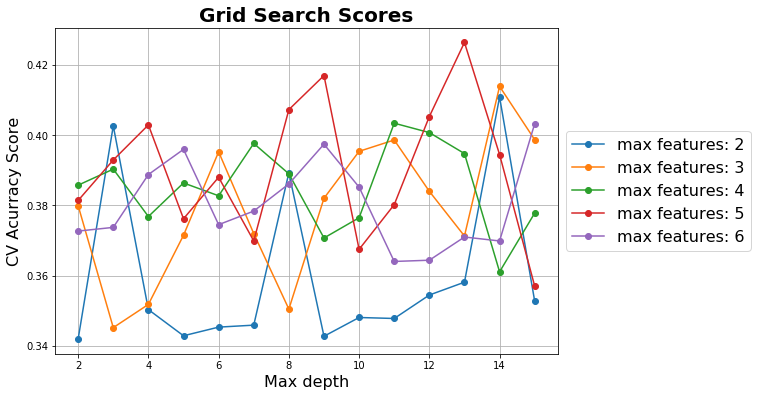

In [38]:
# Calling Method 
grid_param_1= np.arange(2,16) 
grid_param_2 = np.arange(2,7)


plot_grid_search(results.cv_results_, grid_param_1 ,grid_param_2, 'Max depth', 'max features')

plt.legend(loc='center left', fontsize = 16, bbox_to_anchor=(1.0, 0.5))


Random Forest Classifer

In [32]:
# Random Forest Classifer
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


def fit_model2(X, y,params):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter=3, test_size = 0.1,  random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = RandomForestClassifier(random_state = 0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    # change the number of trees for random forest
    #params = {'max_depth':range(1,11), 'max_features':[ 2 , 6, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    #   print "Parameter 'max_depth' is {} for the optimal model.".format(grid.get_params() )

    # Return the optimal model after fitting the data
    return grid #.best_estimator_

In [46]:
grid_param_2 = [ 20, 40, 120]
grid_param_1 =[3,7,12]  
params = {'n_estimators':grid_param_2, 'max_depth':grid_param_1}
results2 = fit_model2(X,y,params)

#print(results2.cv_results_)

In [45]:
print(results2.cv_results_)


{'mean_fit_time': array([0.646981  , 1.02971792, 2.02645   , 1.00483608, 1.85991462,
       3.95148834, 1.61837149, 3.69305038, 6.98124202]), 'std_fit_time': array([0.07711969, 0.05059875, 0.19363456, 0.12400383, 0.06959296,
       0.11622361, 0.02749316, 0.29347046, 0.28653038]), 'mean_score_time': array([0.02616429, 0.03305523, 0.05020968, 0.02566703, 0.03483733,
       0.07628949, 0.02828574, 0.07376019, 0.12349065]), 'std_score_time': array([0.00897384, 0.00220539, 0.00038492, 0.00415474, 0.00415575,
       0.00452121, 0.00243832, 0.01855369, 0.00934925]), 'param_max_depth': masked_array(data=[3, 3, 3, 7, 7, 7, 12, 12, 12],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[20, 40, 90, 20, 40, 90, 20, 40, 90],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
         

In [47]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
    scores_mean1 = cv_results['mean_train_score']
    scores_mean1 = np.array(scores_mean1).reshape(len(grid_param_2),len(grid_param_1))
   
    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:],   '-o', label = name_param_2 + ': ' + str(val))
        #ax.plot(grid_param_1, scores_mean1[idx,:],   '-o', label = 'Train_set')  #label= name_param_2 + ': ' + str(val))
        #ax.errorbar(grid_param_1, scores_mean[idx,:],scores_sd[idx,:] , linestyle='None', marker='^')
    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Acurracy Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')


Populating the interactive namespace from numpy and matplotlib


C:\Users\GG\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\GG\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


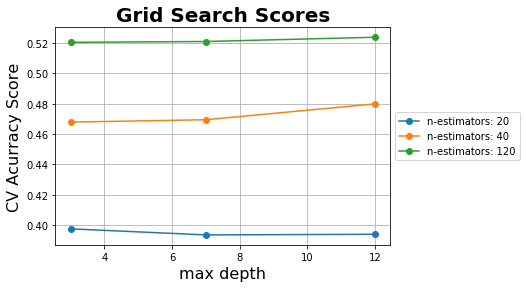

In [48]:
# Calling Method 
%pylab inline
 

plot_grid_search(results2.cv_results_, grid_param_1 ,grid_param_2,'max depth', 'n-estimators'  )
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

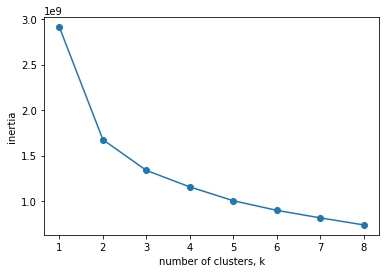

In [4]:
#Clustering to find the optimum clusters
from sklearn.cluster import KMeans
ks = range(1, 9)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters= k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
